In [2]:
#pip install openpyxl
#pip install jupyter_contrib_nbextensions

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
data = pd.read_excel(r'./data.xlsx')
df = pd.DataFrame(data)

In [28]:
df.dropna(subset=['rgdpna'], inplace=True)

def calc5(row):
    year = row['year']
    country = row['country']
    rgdpna = row['rgdpna']
    tally = 0
    y1 = 1
    y2 = 1
    y5 = 1
    
    future = year
    while future <= year + 5:
        future += 1
        future_rgdpna = df.loc[(df['country'] == country) & (df['year'] == future), 'rgdpna']

        if future_rgdpna.empty:
            return pd.Series([None, None, None, None])
        else:
            tally += future_rgdpna.iloc[0] / rgdpna - 1
            
            if future == year + 1:
                y1 = future_rgdpna.iloc[0] / rgdpna - 1
            elif future == year + 2:
                y2 = future_rgdpna.iloc[0] / rgdpna - 1
            elif future == year + 5:
                y5 = future_rgdpna.iloc[0] / rgdpna - 1
   

    return pd.Series([tally, y1, y2, y5])



#add colums
df[['calc5', 'y1', 'y2', 'y5']] = df.apply(lambda row: calc5(row), axis=1)
#calc5 for 5 years in the future growth added every year, not exponential
#the others exponentioal


df['workingPop'] = df['emp'] / df['pop']
df['expenditure'] = df['ccon'] / df['cn']

df.sample(n=10)

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,pl_x,pl_m,pl_n,pl_k,calc5,y1,y2,y5,workingPop,expenditure
8447,MWI,Malawi,Kwacha,1997,1.224157e+04,1.209106e+04,10.264906,4.230830,NaN,1.508639,...,0.512442,0.507080,0.214729,NaN,0.160548,1.202359e-02,0.024571,0.017157,0.412165,0.612416
1665,BOL,Bolivia (Plurinational State of),Boliviano,2005,3.686141e+04,3.597514e+04,9.232306,4.046131,NaN,2.613873,...,0.513046,0.429015,0.221210,0.665211,NaN,NaN,NaN,NaN,0.438258,0.385101
6515,KOR,Republic of Korea,Won,1955,2.599132e+04,2.606760e+04,21.521539,6.170075,2557.309588,1.857497,...,0.098218,0.077752,0.048341,NaN,0.924013,4.613400e-02,0.115893,0.189134,0.286693,0.125090
5288,HTI,Haiti,Gourde,1988,1.000402e+04,1.091029e+04,6.758223,2.203852,NaN,1.319199,...,0.458763,0.440189,0.148232,NaN,-0.419472,-2.913429e-02,-0.019055,-0.105065,0.326099,0.167860
114,AGO,Angola,Kwanza,1994,3.615769e+04,3.579054e+04,13.503747,7.466424,NaN,1.199139,...,0.401066,0.522183,0.251835,0.476991,2.365626,1.500001e-01,0.305760,0.498447,0.552915,0.059912
6401,KHM,Cambodia,Riel,1981,5.945376e+03,5.923138e+03,6.749847,2.945439,NaN,1.342158,...,0.289278,0.282720,0.135302,NaN,0.924783,8.830189e-08,0.044334,0.190615,0.436371,0.450578
1239,BHR,Bahrain,Bahraini Dinar,1999,1.306040e+04,1.323277e+04,0.636541,0.233598,NaN,2.320514,...,0.423869,0.493190,0.517301,1.586873,1.170907,7.018162e-02,0.096840,0.289059,0.366980,0.175681
6522,KOR,Republic of Korea,Won,1962,3.222165e+04,3.362648e+04,26.383169,7.324624,2829.413815,1.676018,...,0.122436,0.127760,0.047936,0.407991,1.848620,7.791889e-02,0.163106,0.436482,0.277625,0.165292
9701,PSE,State of Palestine,US Dollar,1991,5.144825e+03,5.240500e+03,2.191002,0.413338,NaN,NaN,...,0.504643,0.449504,0.386874,NaN,3.598912,2.388227e-01,0.369970,0.722976,0.188652,0.243551
12151,USA,United States,US Dollar,1991,9.831967e+06,9.939456e+06,254.539370,121.567062,1787.337817,3.452302,...,0.612786,0.620122,0.474347,1.000000,0.752543,3.522446e-02,0.063723,0.179148,0.477596,0.201450


In [9]:
df.dropna(subset=['y5'], inplace=True)

# Assuming df is your DataFrame
subset_df = df[['year', 'country', 'calc5', 'y5', 'y2', 'y1', 'rgdpna', 'avh', 'workingPop', 'hc', 'ctfp', 'expenditure', 'xr']]
dfs = subset_df.sort_values(by='calc5', ascending=False)

# Combine NaN filtering for 'avh' and 'cn' using any(axis=1)
#print(dfs.count())
#dfs = dfs.dropna(subset=['avh', 'expenditure'])
#print(dfs.count())
#dfs = dfs.dropna(subset=['avh', 'workingPop', 'hc', 'ctfp', 'expenditure', 'xr'])
#print(dfs.count())
# Display the resulting DataFrame
#dfs.sample(n=5)

#df.dropna(inplace=True)
#print(dfs.count())


#df.groupby('country').sum()
dfs.sample(n=6)

,year,country,calc5,y5,y2,y1,rgdpna,avh,workingPop,hc,ctfp,expenditure,xr
7024,1974,Lesotho,1.402451,0.343008,0.069921,-0.081794,1145.292969,NaN,NaN,1.569523,NaN,1.467843,0.679477
5061,1971,"China, Hong Kong SAR",2.041899,0.484803,0.241943,0.106117,32034.150391,2527.05056,0.401425,1.939989,0.947361,0.391301,5.980410
9189,1969,Pakistan,1.223389,0.286192,0.129683,0.112435,101327.164062,NaN,0.295316,1.185283,NaN,0.770918,4.761900
11070,1960,Syrian Arab Republic,1.959366,0.469514,0.392196,0.015831,20519.195312,NaN,0.305332,1.225659,NaN,0.223842,3.654974
4662,1992,Guinea-Bissau,0.512891,0.204502,0.053062,0.022760,1824.118530,NaN,0.380900,NaN,NaN,0.325858,101.425013
7145,1955,Luxembourg,0.719706,0.159269,0.095837,0.042735,5986.648926,NaN,0.439175,1.587244,1.066841,0.196629,1.239220


In [44]:
#niet echt meer nodig

# dfs.dropna(subset=['y5'], inplace=True)
# dfs['top_10y'] = 0.0

# for year, group in dfs.groupby('year'):
    
#     # Get the top 10 rows based on calc5
#     top_10 = group.nlargest(10, 'y5')

        
#     dfs.loc[top_10.index, 'top_10y'] = 1


# dfs.reset_index(drop=True, inplace=True)

# pd.set_option('display.max_rows', None)
#dfs.sample(n=100)


In [31]:
from sklearn import svm

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import pandas as pd

rdf = dfs.copy()

# Assuming 'avh', 'workingPop', 'hc', 'ctfp', 'expenditure', 'xr', 'top_10y', 'calc5' are columns in your DataFrame
columns_to_fill = ['avh', 'workingPop', 'hc', 'ctfp', 'expenditure', 'xr']
rdf[columns_to_fill] = rdf[columns_to_fill].fillna(rdf[columns_to_fill].mean())


X = rdf[['avh', 'workingPop', 'hc', 'ctfp', 'expenditure', 'xr']]



#y5
y = rdf['y5']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Calculate predictions on the test set
y_pred = knn_regressor.predict(X_test)

rdf.loc[X_test.index, 'fc5'] = y_pred

trdf = rdf.loc[X_test.index].copy()
trdf = trdf[['fc5'] + [col for col in trdf.columns if col != 'fc5']]



# For 'y2' !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# For 'y2'
y2 = rdf['y2']
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)
knn_regressor_y2 = KNeighborsRegressor(n_neighbors=5)
knn_regressor_y2.fit(X_train, y2_train)
y2_pred = knn_regressor_y2.predict(X_test)
rdf.loc[X_test.index, 'fc2'] = y2_pred
trdf['fc2'] = rdf.loc[X_test.index, 'fc2']

# For 'y1'
y1 = rdf['y1']
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
knn_regressor_y1 = KNeighborsRegressor(n_neighbors=5)
knn_regressor_y1.fit(X_train, y1_train)
y1_pred = knn_regressor_y1.predict(X_test)
rdf.loc[X_test.index, 'fc1'] = y1_pred
trdf['fc1'] = rdf.loc[X_test.index, 'fc1']

# For 'calc5'
calc5 = rdf['calc5']
X_train, X_test, calc5_train, calc5_test = train_test_split(X, calc5, test_size=0.2, random_state=42)
knn_regressor_calc5 = KNeighborsRegressor(n_neighbors=5)
knn_regressor_calc5.fit(X_train, calc5_train)
calc5_pred = knn_regressor_calc5.predict(X_test)
rdf.loc[X_test.index, 'fc_calc5'] = calc5_pred
trdf['fc_calc5'] = rdf.loc[X_test.index, 'fc_calc5']




trdf.sample(n = 10)
#trdf.tail()

,fc5,year,country,calc5,y5,y2,y1,rgdpna,avh,workingPop,hc,ctfp,expenditure,xr,top_10y,fc2,fc1,fc_calc5
4192,0.213067,2003,Guatemala,0.883546,0.232363,0.065150,0.031521,7.790898e+04,2018.324307,0.345555,1.629793,0.713999,0.353848,7.940847,0.0,0.087053,0.041963,0.899859
3615,0.226154,1998,Dominican Republic,0.995408,0.211284,0.127518,0.067153,6.748004e+04,2283.071978,0.342387,2.112484,0.696131,0.359284,15.266592,0.0,0.106843,0.056504,0.980829
1905,0.443516,1997,Viet Nam,1.422483,0.354495,0.108123,0.057644,1.874247e+05,2317.492884,0.440197,1.876619,0.746629,0.758091,11683.333333,0.0,0.178517,0.087888,1.866480
1183,0.377632,2002,Nigeria,1.736279,0.411184,0.172774,0.073472,4.335723e+05,2018.324307,0.307017,1.517784,0.208021,0.083826,120.578158,0.0,0.149484,0.071040,1.576800
1420,0.276569,2003,U.R. of Tanzania: Mainland,1.611557,0.387433,0.157751,0.078283,5.016819e+04,2018.324307,0.415318,1.527357,0.316516,0.259930,1038.419007,0.0,0.097653,0.041244,1.178188
2697,0.246352,1980,India,1.189125,0.286022,0.096907,0.060062,9.207888e+05,2064.027914,0.378719,1.284942,0.329725,0.369755,7.862945,0.0,0.082752,0.054630,1.026294
6749,0.136383,1980,Italy,0.308278,0.087090,0.012613,0.008442,1.585854e+06,1849.261058,0.379810,2.291411,1.206324,0.204783,0.442318,0.0,0.074273,0.036729,0.649552
866,0.401567,1963,Republic of Korea,1.966694,0.474209,0.133061,0.079029,4.680589e+04,2870.580819,0.279475,1.718175,0.247760,0.161653,130.001764,0.0,0.085749,0.044057,1.507206
4903,0.356164,1970,Pakistan,0.741834,0.193540,0.030280,0.015504,1.127199e+05,2241.681599,0.296654,1.191760,0.746629,0.761886,4.761900,0.0,0.135363,0.063742,1.505563
3473,0.218795,1987,Japan,1.020299,0.224952,0.119727,0.067850,3.287472e+06,2083.968170,0.506967,3.125122,0.715552,0.169426,144.637500,0.0,0.110029,0.057198,0.973019


In [63]:
import numpy as np

#5 years
y_true = trdf['y5']
y_pred = trdf['fc5']

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print("forcast gdp growth 5 years ->")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse} \n")

# For 'y2'
y_true_y2 = trdf['y2']
y_pred_y2 = trdf['fc2']

mse_y2 = mean_squared_error(y_true_y2, y_pred_y2)
rmse_y2 = np.sqrt(mse_y2)

print("Forecast GDP growth 2 years ->")
print(f"Mean Squared Error (MSE): {mse_y2}")
print(f"Root Mean Squared Error (RMSE): {rmse_y2}\n")

# For 'y1'
y_true_y1 = trdf['y1']
y_pred_y1 = trdf['fc1']

mse_y1 = mean_squared_error(y_true_y1, y_pred_y1)
rmse_y1 = np.sqrt(mse_y1)

print("Forecast GDP growth 1 year ->")
print(f"Mean Squared Error (MSE): {mse_y1}")
print(f"Root Mean Squared Error (RMSE): {rmse_y1}\n")

# For 'calc5'
y_true_calc5 = trdf['calc5']
y_pred_calc5 = trdf['fc_calc5']

mse_calc5 = mean_squared_error(y_true_calc5, y_pred_calc5)
rmse_calc5 = np.sqrt(mse_calc5)

print("Forecast calc 5 ->")
print(f"Mean Squared Error (MSE): {mse_calc5}")
print(f"Root Mean Squared Error (RMSE): {rmse_calc5}")

forcast gdp growth 5 years ->
Mean Squared Error (MSE): 0.05025126347718665
Root Mean Squared Error (RMSE): 0.2241679358810859 

Forecast GDP growth 2 years ->
Mean Squared Error (MSE): 0.012097327380398839
Root Mean Squared Error (RMSE): 0.10998785105819114

Forecast GDP growth 1 year ->
Mean Squared Error (MSE): 0.0043878934150037895
Root Mean Squared Error (RMSE): 0.06624117612938187

Forecast calc 5 ->
Mean Squared Error (MSE): 0.7882944476682218
Root Mean Squared Error (RMSE): 0.8878594751807415


In [37]:
# filtered_df = rdf[rdf['top_10y'] == 1.0]
# average_calc5 = filtered_df['y5'].mean()
# filtered = rdf[rdf['top_10y'] == 0.0]
# average = filtered['y5'].mean()


# print(f"Average 'calc5' for rows with average = 0.0: {average}")


# print(f"Average 'calc5' for rows with Predicted = 1.0: {average_calc5}")

#Average 'calc5' for rows with average = 0.0: 2.5953089363070467
#Average 'calc5' for rows with Predicted = 1.0: 11.577841821990294

Average 'calc5' for rows with average = 0.0: 0.1967599414563182
Average 'calc5' for rows with Predicted = 1.0: 0.7714417752785027


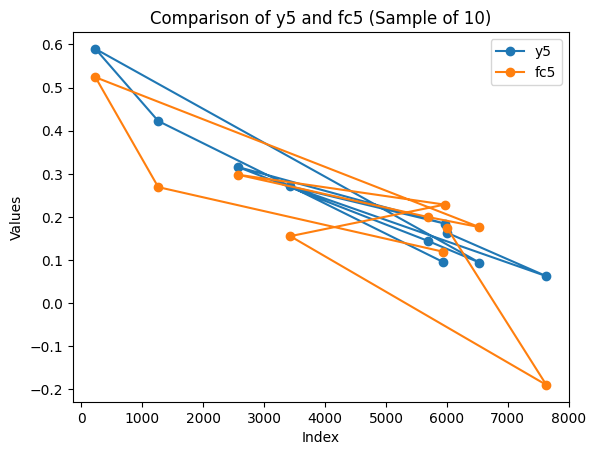

In [72]:
import matplotlib.pyplot as plt

# Take a sample of 10 entries
sample_r = r.sample(10)

# Plot 'y5' and 'fc5' for the sample
plt.plot(sample_r['y5'], label='y5', marker='o')
plt.plot(sample_r['fc5'], label='fc5', marker='o')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of y5 and fc5 (Sample of 10)')
plt.legend()  # Show legend

# Show the plot
plt.show()

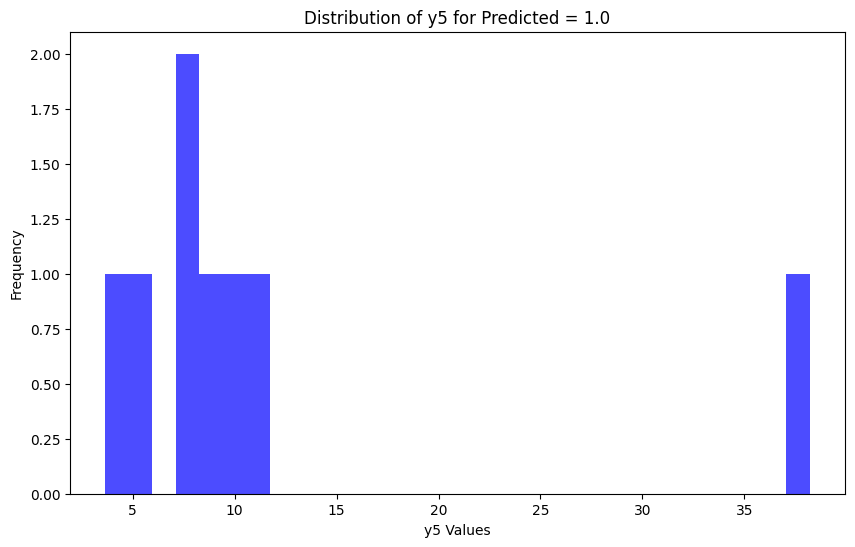

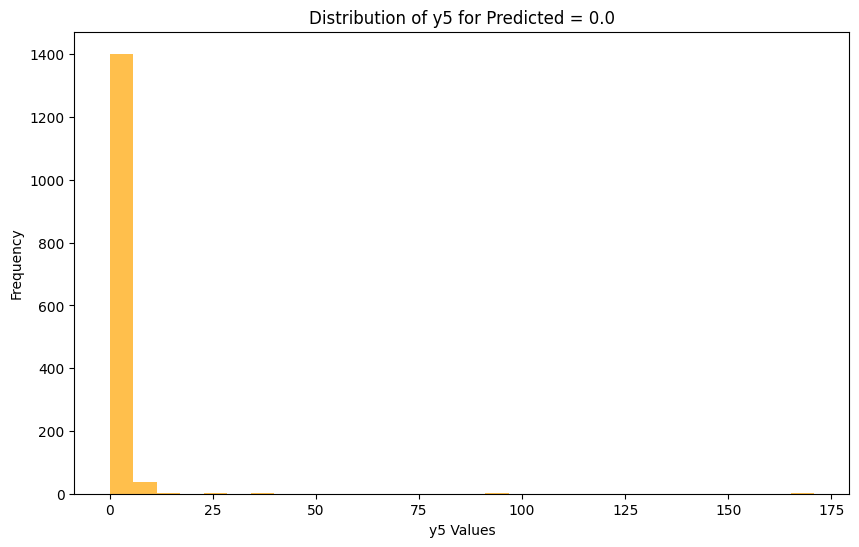

In [62]:



# import matplotlib.pyplot as plt

# # Assuming 'y5' and 'Predicted' are columns in your original DataFrame 'df'

# # Filter rows where 'Predicted' is equal to 1.0
# filtered_df_1 = results_df[results_df['Predicted'] == 1.0]

# # Filter rows where 'Predicted' is equal to 0.0
# filtered_df_0 = results_df[results_df['Predicted'] == 0.0]

# # Plot histograms for 'y5' for rows with 'Predicted' equal to 1.0
# plt.figure(figsize=(10, 6))
# plt.hist(filtered_df_1['y5'].dropna(), bins=30, color='blue', alpha=0.7)
# plt.title('Distribution of y5 for Predicted = 1.0')
# plt.xlabel('y5 Values')
# plt.ylabel('Frequency')
# plt.show()

# # Plot histograms for 'y5' for rows with 'Predicted' equal to 0.0
# plt.figure(figsize=(10, 6))
# plt.hist(filtered_df_0['y5'].dropna(), bins=30, color='orange', alpha=0.7)
# plt.title('Distribution of y5 for Predicted = 0.0')
# plt.xlabel('y5 Values')
# plt.ylabel('Frequency')
# plt.show()
